In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # 统计数据可视化
from scipy import stats
from sklearn.decomposition import PCA
# 绘图风格： style= ["darkgrid"，"whitegrid"，"dark"，"white"，"ticks"]，默认darkgrid
sns.set_style(style="darkgrid")
# 颜色风格： themes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
sns.set_palette(palette='bright')
ChinaFonts = {"黑体": "simhei", "宋体": "simsun", "华文楷体": "STKAITI"}
plt.rcParams["font.sans-serif"] = ChinaFonts["黑体"]  # 解决中文乱码问题
plt.rcParams["axes.unicode_minus"] = False  # 解决负号无法正常显示的问题
path_data = "/home/carton/workspace/python/Multivariate-statistical-analysis/database/第三章数据/"  # 设置 数据路径
path_pic = "/home/carton/workspace/python/Multivariate-statistical-analysis/save-database/第三章数据/"  # 设置 图像保存路径

## 读取数据

In [3]:
file_path = path_data + "学生体型数据.xlsx"
df_data = pd.read_excel(file_path, index_col=0) # 读取数据，指定第1列为索引
df_data.head() # 显示前5个记录，观察数据读取是否正确

,身高(cm),体重(kg),胸围(cm),坐高(cm)
序号,,,,
1,148,41,72,78
2,160,49,77,86
3,159,45,80,86
4,153,43,76,83
5,151,42,77,80


## 探索性数据分析
粗略做的话就不用了


可以看出数据在数量级上的差异程度，例如极大、极小值以及分布情况，用于判断是否需要做预处理

In [4]:
stats_dic = { "mean": "均值", "std": "标准差", "max": "极大值", "min": "极小值","skew":"偏度", "kurt":"峰度"}
df_data_stats = df_data.apply(stats_dic.keys())
df_data_stats = df_data_stats.rename(index=stats_dic) # 采用字典将指标替换为中文
df_data_stats.T.round(2)

,均值,标准差,极大值,极小值,偏度,峰度
身高(cm),149.00,7.32,161.0,137.0,0.03,-1.13
体重(kg),38.70,6.46,49.0,29.0,0.14,-1.33
胸围(cm),72.23,5.15,82.0,64.0,0.18,-1.20
坐高(cm),79.37,4.27,88.0,73.0,0.46,-0.71


## 标准化
方法1：基于pandas包，将每一项减去相应指标均值且除以标准差ddof=1 选项，在计算标准差的时候除以n-1，而非除以n

方法2：采用scipy包的zscore函数进行标准化

In [5]:
df_zscore1 = (df_data - df_data.mean())/df_data.std(ddof=1)
df_zscore1.head().round(4)

,身高(cm),体重(kg),胸围(cm),坐高(cm)
序号,,,,
1,-0.1367,0.3560,-0.0453,-0.3200
2,1.5036,1.5944,0.9254,1.5532
3,1.3670,0.9752,1.5079,1.5532
4,0.5468,0.6656,0.7313,0.8507
5,0.2734,0.5108,0.9254,0.1483


In [6]:
df_zscore2 = df_data.apply(stats.zscore,ddof=1)
df_zscore2.head().round(4)

,身高(cm),体重(kg),胸围(cm),坐高(cm)
序号,,,,
1,-0.1367,0.3560,-0.0453,-0.3200
2,1.5036,1.5944,0.9254,1.5532
3,1.3670,0.9752,1.5079,1.5532
4,0.5468,0.6656,0.7313,0.8507
5,0.2734,0.5108,0.9254,0.1483


## 计算相关系数矩阵，绘制热力图来展示

In [7]:
df_corr = df_data.corr()
df_corr.head().round(4)

,身高(cm),体重(kg),胸围(cm),坐高(cm)
身高(cm),1.0000,0.8632,0.7321,0.9205
体重(kg),0.8632,1.0000,0.8965,0.8827
胸围(cm),0.7321,0.8965,1.0000,0.7829
坐高(cm),0.9205,0.8827,0.7829,1.0000


<AxesSubplot: >

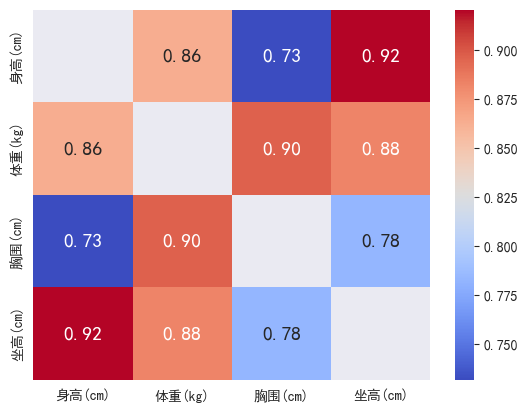

In [9]:
sns.heatmap(df_data.corr(),annot=True,fmt=".2f", cmap="coolwarm",annot_kws={ "size":14},mask=(df_data.corr()==1))

## 计算特征值和特征向量，进行排序

In [10]:
W,V = np.linalg.eig(df_corr) # 计算特征值和特征向量
sort_id = np.argsort(W)[::-1] # 升序排序后，逆转
W = W[sort_id]; V = V[:,sort_id]
print(W); print(V)
print("特征值之和为：{:.2f}".format(sum(W)))

[3.541098   0.31338316 0.07940895 0.06610989]
[[ 0.49696605  0.54321279 -0.44962709  0.50574706]
 [ 0.51457053 -0.2102455  -0.46233003 -0.69084365]
 [ 0.48090067 -0.7246214   0.17517651  0.46148842]
 [ 0.50692846  0.36829406  0.74390834 -0.2323433 ]]
特征值之和为：4.00


## 调用PCA包计算特征值，贡献率，累计贡献率

In [11]:
pca_data = PCA() # 建立模型，用 PCA(n_components=2) 可指定主成分数目
df_tem = df_data.apply(stats.zscore,ddof=1) # 前面进行标准化处理的数据集
principalComponents=pca_data.fit_transform(df_tem)# 训练模型得PCA参数、得分
col_name = ["特征"+str(i) for i in range(1,pca_data.n_components_+1)]
# 自动生成 特征名称
df_res = pd.DataFrame(pca_data.components_.T, columns=col_name, index=df_data.columns[0:]) # 先转置，列为 特征名称, 行为变量名
df_res.loc["特征值",:] = pca_data.n_components_ * pca_data.explained_variance_ / pca_data.explained_variance_.sum()# 归一化处理， (若为协方差矩阵)原始数据 之和 不等于 变量个数
df_res.loc["贡献率",:] = pca_data.explained_variance_ratio_
df_res.loc["累计贡献率",:] = np.cumsum(pca_data.explained_variance_ratio_)
display(df_res)

,特征1,特征2,特征3,特征4
身高(cm),0.496966,-0.543213,-0.449627,0.505747
体重(kg),0.514571,0.210246,-0.462330,-0.690844
胸围(cm),0.480901,0.724621,0.175177,0.461488
坐高(cm),0.506928,-0.368294,0.743908,-0.232343
特征值,3.541098,0.313383,0.079409,0.066110
贡献率,0.885274,0.078346,0.019852,0.016527
累计贡献率,0.885274,0.963620,0.983473,1.000000


## 绘制碎石图

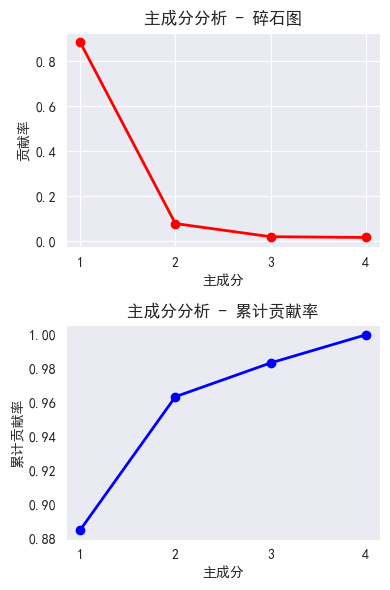

In [12]:
PC_values = np.arange(pca_data.n_components_)+1 # 主成分顺序
fig, axes = plt.subplots(2,1, figsize=(4,6))
axes[0].plot(PC_values, df_res.loc["贡献率",:], 'ro-', linewidth=2)
axes[0].set_xticks(PC_values)
axes[0].set_title('主成分分析 - 碎石图')
axes[0].set_xlabel('主成分'); axes[0].set_ylabel('贡献率')
axes[1].plot(PC_values, df_res.loc["累计贡献率",:], 
'bo-', linewidth=2)
axes[1].set_xticks(PC_values)
axes[1].set_title('主成分分析 - 累计贡献率')
axes[1].set_xlabel('主成分'); axes[1].set_ylabel('累计贡献率')
plt.grid() # 添加网格
plt.tight_layout() # 调整多图间距，避免重叠
plt.show()

## 绘制散点图分析

Text(0.5, 1.0, '主成分1 和 主成分2 得分含义')

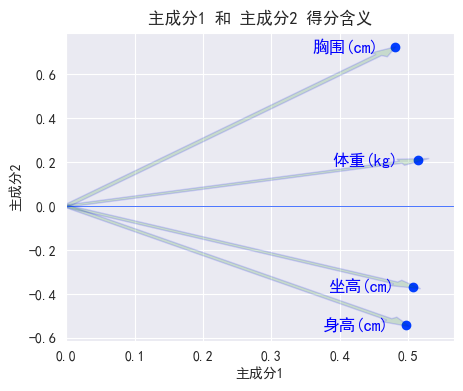

In [13]:
plt.subplots(figsize=(5,4)) # 绘制 成分散点图 —— 分析内涵
c_x = df_res.loc[df_data.columns[0:],"特征1"] # 提取特征数据
c_y = df_res.loc[df_data.columns[0:],"特征2"]
plt.scatter(c_x,c_y)
plt.xlim(0,np.max(c_x)*1.1) # 将绘图范围放宽，以免文字被挤压
for i in range(len(c_x)):
    plt.arrow(0, 0,c_x[i]*0.95, c_y[i]*0.95, color='b', alpha=0.15, width=0.01,fc='g')
    plt.text(c_x[i]*0.85, c_y[i], df_data.columns[i], color='b', ha='center', va='center',fontsize=12)
plt.xlabel("主成分{}".format(1))
plt.ylabel("主成分{}".format(2))
plt.hlines(0,0,np.max(c_x)*1.1, linewidth=0.5)
plt.title("主成分{} 和 主成分{} 得分含义".format(1,2))

## 绘制特征向量热力图分析

Text(0.5, 1.0, '特征向量热力图')

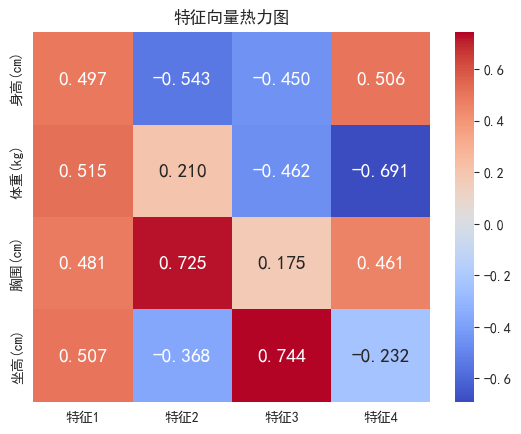

In [14]:
sns.heatmap(df_res.head(4), annot=True, fmt=".3f", annot_kws={ "size":14},cmap="coolwarm") # 提取特征向量值
plt.title("特征向量热力图")

## 计算样品的主成分得分值

In [16]:
df_pc = pd.DataFrame(data=principalComponents, columns=col_name) # 主成分得分值
df_pc = df_pc.set_index(df_data.index).copy() # 重新设置序号，以原始数据序号为准
df_pc

,特征1,特征2,特征3,特征4
序号,,,,
1,-0.068734,0.234134,-0.349124,-0.261647
2,2.800064,-0.383019,-0.095682,-0.274785
3,2.693620,-0.016892,0.354073,0.352625
4,1.397171,0.059514,0.207388,-0.043480
5,0.918935,0.574865,-0.086660,0.177995
6,-2.789728,-0.342897,0.032548,-0.030623
7,2.401480,0.164876,-0.461295,-0.160248
8,-2.766186,0.312558,-0.032360,-0.218303
9,1.529464,1.675749,-0.325696,0.007425


## 绘制样品主成分散点图，分析含义
横坐标代表第一主成分，纵坐标代表第二主成分
可以通过分析横坐标最左端，最右端，纵坐标最左端，最右端分析主成分的实际含义

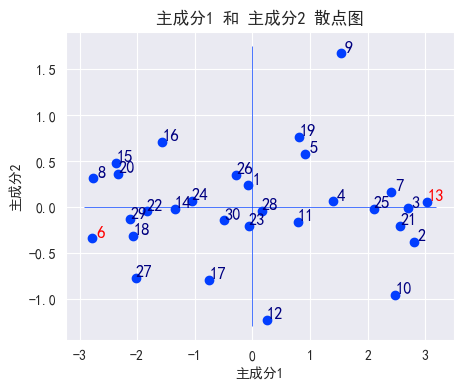

In [17]:
plt.subplots(figsize=(5,4)) # 绘制 成分得分值图 —— 分析内涵
p_x=df_pc.iloc[:,0]; p_y=df_pc.iloc[:,1] # 选择主成分
R_x = np.max(p_x)-np.min(p_x) # range of p_x
R_y = np.max(p_y)-np.min(p_y) # range of p_y
plt.scatter(p_x,p_y)
d_pian = 0.05 # 标注文字时做一定偏移，避免覆盖散点
for i in range(1,len(df_pc)+1):
    if np.max(p_x) == p_x[i] or np.min(p_x) == p_x[i]:
        plt.text(p_x[i] + R_x*d_pian/2, p_y[i]+ R_y*d_pian/2, df_pc.index[i-1], color='red', ha='center', va='center',fontsize=12)
    else:
        plt.text(p_x[i] + R_x*d_pian/2, p_y[i]+ R_y*d_pian/2, df_pc.index[i-1], color='navy', ha='center', va='center',fontsize=12)
plt.xlabel("主成分{}".format(1)); plt.ylabel("主成分{}".format(2))
plt.hlines(0,np.min(p_x)*(1+d_pian),np.max(p_x)*(1+d_pian), linewidth=0.5)
plt.vlines(0,np.min(p_y)*(1+d_pian),np.max(p_y)*(1+d_pian), linewidth=0.5)
plt.title("主成分{} 和 主成分{} 散点图".format(1,2))
plt.show()

## 利用主成分对图片降维
将颜色作为主成分

In [18]:
def comp_2d(fig_0, n_pca=100):
    pca_tem = PCA(n_pca)
    fig_r, fig_g, fig_b = fig_0[:, :, 0], fig_0[:, :, 1], fig_0[:, :, 2] # 拆分为不同色彩
    r_tran = pca_tem.fit_transform(fig_r) # 使用主成分分析
    r_inv = pca_tem.inverse_transform(r_tran)
    g_tran = pca_tem.fit_transform(fig_g)
    g_inv = pca_tem.inverse_transform(g_tran)
    b_tran = pca_tem.fit_transform(fig_b)
    b_inv = pca_tem.inverse_transform(b_tran)
    fig_compressed = (np.dstack((r_inv, g_inv, b_inv))).astype(np.uint8) #压缩
    return fig_compressed

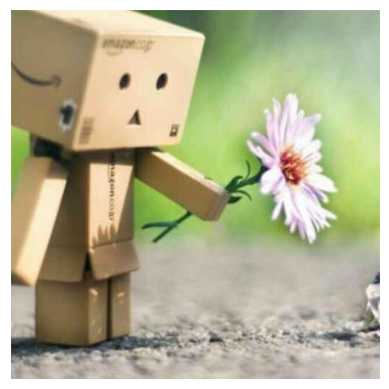

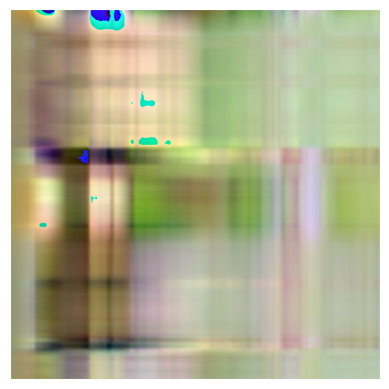

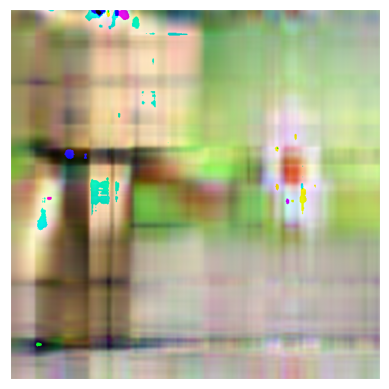

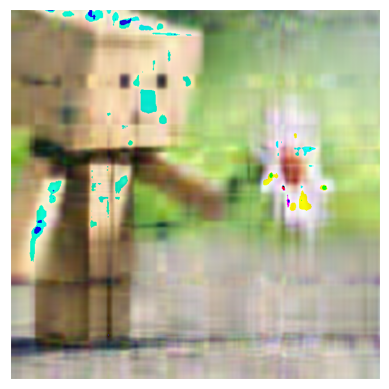

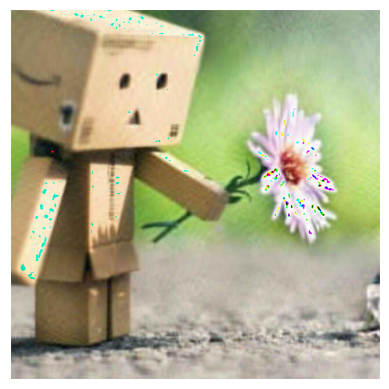

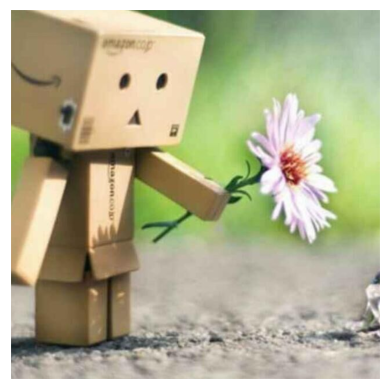

In [20]:
fig0 = plt.imread(path_data + "carton.jpg")
n_list = [2,5,10,50,426] # 426选择保留精度99.99%时需要的主成分数目
LEN = len(n_list) + 1
plt.figure()
plt.imshow(fig0); plt.xticks([]); plt.yticks([])
for i in range(1,LEN):
    fig_c = comp_2d(fig0,n_list[i-1])
    plt.figure()
    plt.imshow(fig_c); plt.xticks([]); plt.yticks([])
plt.show()

## 核主成分分析（非线性数据）
1. 通过sklearn的datasets模块中make_circles()生成300个同心圆数据集，并绘制散点图；
2. 采用scikit-learn的模块decomposition中PCA对数据集降维，并对主成分得分绘制散点图；
3. 采用scikit-learn的模块decomposition中KernelPCA，分别选择多项式核(poly)和高斯核(rbf)对数据集降维，并对主成分得分绘制散点图。

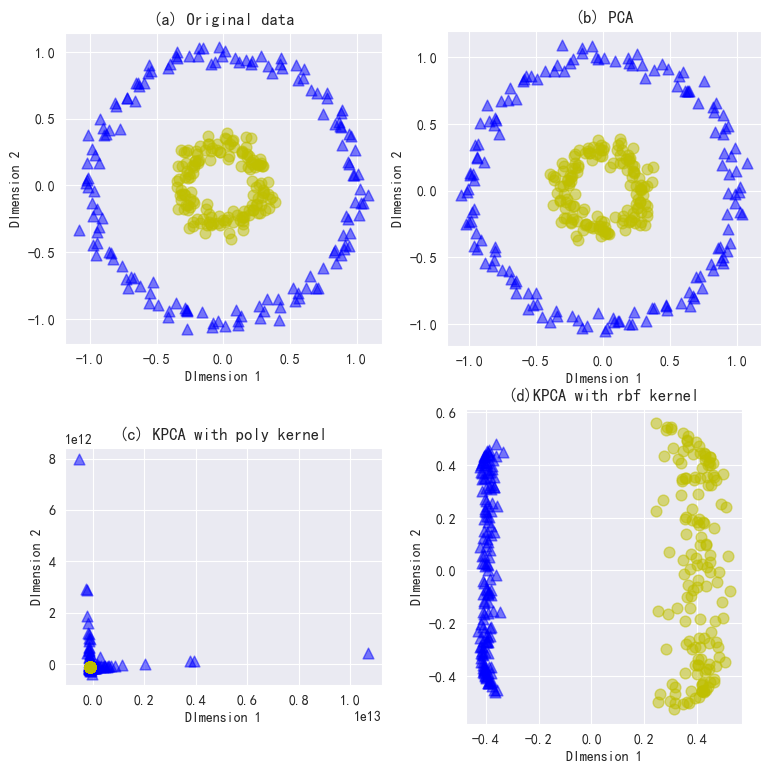

In [21]:
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA # 线性 PCA，非线性核PCA
# 随机生成一个包含300个样本的同心圆数据集
samples, label = datasets.make_circles(n_samples=300, factor=0.3, noise=0.05)
c1 = label == 0; c2 = label == 1
# 设置画布大小
plt.figure(figsize=(9,9))
# 原始数据可视化
plt.subplot(2,2,1, aspect="equal"); plt.title("(a) Original data")
plt.scatter(samples[c1,0], samples[c1,1], c="b", s=60, alpha=0.5, marker="^")
plt.scatter(samples[c2,0], samples[c2,1], c="y", s=60, alpha=0.5, marker="o")
plt.xlabel("DImension 1"); plt.ylabel("DImension 2")
# PCA 降维后可视化
pca = PCA(n_components=2); data_pca = pca.fit_transform(samples)
plt.subplot(2,2,2, aspect="equal"); plt.title("(b) PCA")
plt.scatter(data_pca[c1,0], data_pca[c1,1], c="b", s=60, alpha=0.5, marker="^")
plt.scatter(data_pca[c2,0], data_pca[c2,1], c="y", s=60, alpha=0.5, marker="o")
plt.xlabel("DImension 1"); plt.ylabel("DImension 2")
# KPCA - 多项式核 降维后可视化
kpca_poly = KernelPCA(kernel="poly", degree=20, gamma=15)
data_poly = kpca_poly.fit_transform(samples)
plt.subplot(2,2,3, aspect="equal"); plt.title("(c) KPCA with poly kernel")
plt.scatter(data_poly[c1,0], data_poly[c1,1], c="b", s=60, alpha=0.5, marker="^")
plt.scatter(data_poly[c2,0], data_poly[c2,1], c="y", s=60, alpha=0.5, marker="o")
plt.xlabel("DImension 1"); plt.ylabel("DImension 2")
# KPCA - 高斯核 降维后可视化
kpca_rbf = KernelPCA(kernel="rbf", gamma=3)
data_rbf = kpca_rbf.fit_transform(samples)
plt.subplot(2,2,4, aspect="equal")
plt.title("(d)KPCA with rbf kernel")
plt.scatter(data_rbf[c1,0], data_rbf[c1,1], c="b", s=60, alpha=0.5, marker="^")
plt.scatter(data_rbf[c2,0], data_rbf[c2,1], c="y", s=60, alpha=0.5, marker="o")
plt.xlabel("DImension 1")
plt.ylabel("DImension 2")
plt.show()